In [1]:
import gymnasium as gym
import cookiedisaster
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from BaseAgent import AbstractAgent
from CookieAgent import CookieAgent
print(torch.__version__)

SEED=2
np.random.seed(SEED)
random.seed(SEED)

2.2.2


In [2]:
# # actor critic model
# class PolicyNetwork(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(PolicyNetwork, self).__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, output_dim),
#             nn.Softmax(dim=-1)
#         )

#     def forward(self, x):
#         return self.fc(x)  

# class ValueNetwork(nn.Module):
#     def __init__(self, input_dim):
#         super(ValueNetwork, self).__init__()
#         self.fc = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 1)
#         )

#     def forward(self, x):
#         return self.fc(x)

# # important parameters that need to be updated based on the environment
# ENV_WIDTH=0.001
# ENV_LIFETIME=1
# MAX_TIME=ENV_LIFETIME*10*5 # 10 cookies elapse time (lifetime*steps_per_second*nr_of_elapsed_cookies)

# def normalize(value, min_value, max_value, scale_min=-1, scale_max=1):
#     return ((value - min_value) / (max_value - min_value)) * (scale_max - scale_min) + scale_min

# def preprocess_state(state):
#     # Assuming state is a dictionary like:
#     # {'robot': {'pos': x, 'vel': y}, 'cookie': {'pos': z, 'time': w}}
    
#     robot_pos = normalize(state['agent']['pos'], 0, ENV_WIDTH)
#     robot_vel = normalize(state['agent']['vel'], -4, 4)
#     cookie_pos = normalize(state['cookie']['pos'], 0, ENV_WIDTH)
#     cookie_time = normalize(state['cookie']['time'], 0, ENV_LIFETIME)
#     distance = robot_pos - cookie_pos
#     direction = 1 if distance > 0 else -1
    
#     # Return the normalized state as a numpy array
#     return np.array([robot_pos, robot_vel, cookie_pos, cookie_time,distance, direction])

# def update_env(state):
#     global ENV_WIDTH,ENV_LIFETIME,MAX_TIME
#     ENV_WIDTH=state['agent']['pos']*2
#     ENV_LIFETIME=state['cookie']['time']
#     MAX_TIME=ENV_LIFETIME*10*5 

# class CookiePatrolAgent(AbstractAgent):
#     def __init__(self, input_dim, output_dim,epsilon=0, lr=0.001,save_path=None):
#         super().__init__()
#         self.policy = PolicyNetwork(input_dim, output_dim)
#         self.value = ValueNetwork(input_dim)
#         self.epsilon = epsilon
#         self.count=0
#         if save_path:
#             self.load(save_path)
#         else:
#             self.policy_optimizer = optim.Adam(self.policy.parameters(), lr=lr)
#             self.value_optimizer = optim.Adam(self.value.parameters(), lr=lr)

#     def select_action(self, observation):
#         if self.count==0:
#             print('First observation:',observation)
#             update_env(observation)
#             self.count+=1
#         observation=preprocess_state(observation)
#         state_tensor = torch.FloatTensor(observation).unsqueeze(0)
#         action_probs = self.policy(state_tensor)
#         distribution = torch.distributions.Categorical(action_probs)
#         action = distribution.sample()
#         self.log_prob = distribution.log_prob(action)
#         if np.random.rand() < self.epsilon:
#             return np.random.choice([0, 1, 2])
#         return action.item()

#     def learn(self, state, reward, next_state, done):
#         state=preprocess_state(state)
#         next_state=preprocess_state(next_state)
#         state_value = self.value(torch.FloatTensor(state).unsqueeze(0))
#         next_state_value = self.value(torch.FloatTensor(next_state).unsqueeze(0))
#         td_target = reward + (0.99 * next_state_value * (1 - int(done)))
#         td_error = td_target - state_value
        
#         # Critic loss
#         critic_loss = td_error.pow(2)
#         self.value_optimizer.zero_grad()
#         critic_loss.backward()
#         self.value_optimizer.step()

#         # Actor loss
#         actor_loss = -self.log_prob * td_error.detach()
#         self.policy_optimizer.zero_grad()
#         actor_loss.backward()
#         self.policy_optimizer.step()

#         # update epsilon if the agent is learning
#         if self.epsilon!=0:
#             self.epsilon = max(0.01, self.epsilon * 0.995)
        

#     def save(self, path):
#         torch.save({'policy_state_dict': self.policy.state_dict(),
#                     'value_state_dict': self.value.state_dict()}, path)

#     def load(self, path):
#         checkpoint = torch.load(path)
#         self.policy.load_state_dict(checkpoint['policy_state_dict'])
#         self.value.load_state_dict(checkpoint['value_state_dict'])

#     #ask fabio can have extra functions here, or keep seperate from base agent??


In [3]:
# def train_on_environments(envs, num_episodes_per_env=20, gamma=0.99):
#     results = {}
#     agent_parameters = {'input_dim': 6, 'output_dim': envs[0].action_space.n, 'epsilon':0.5}
#     agent = CookieAgent(**agent_parameters)
    
#     for i in range(len(envs)):
#         env = envs[i]
#         episode_rewards = []
#         for episode in range(num_episodes_per_env):
#             state = env.reset()[0]
#             # print('state',state)
#             if episode==0:
#                 agent.update_env(state)
#             # state = preprocess_state(state)
#             done = False
#             total_reward = 0
#             count = 0
#             while not done:
#                 if count > agent.MAX_TIME:
#                     # print('time out')
#                     break
#                 count+=1
#                 action = agent.select_action(state)
#                 next_state, reward, done, _, _ = env.step(action)
#                 # print('next_state',next_state)
#                 # next_state = preprocess_state(next_state)

#                 agent.learn(state, reward, next_state, done)
#                 state = next_state
#                 total_reward += reward

#             episode_rewards.append(total_reward)
#             # print('ep,end')
#             if episode % 10 == 0:
#                 print(f"Environment {i}: Episode {episode} Reward: {total_reward}")
        
#         results[i] = episode_rewards
#     return results, agent


# envs = [
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.01}),
# ]
# random.shuffle(envs)
# all_env_results,agent = train_on_environments(envs, num_episodes_per_env=5)

# # Optionally, print or plot the results for each environment
# for env_name, rewards in all_env_results.items():
#     print(f"Results for {env_name}: Average Reward: {sum(rewards) / len(rewards)}")


In [4]:
# envs = [
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 10, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 5, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":5, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":4, "friction": lambda vel: - abs(vel)*vel * 0.01}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.05}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.08}),
#     gym.make('cookiedisaster-v1',config={"img": "cake","width" : 12, "lifetime":7, "friction": lambda vel: - abs(vel)*vel * 0.01}),
# ]
# random.shuffle(envs)
# envs[0].spec.kwargs['config'],envs[1].spec.kwargs['config'],envs[2].spec.kwargs['config']

In [5]:
# agent.save('cookie_patrol_agent.pth')

In [6]:
properAgent = CookieAgent()
properAgent.load('cookie_patrol_agent.pth')


In [7]:
# plt.plot(all_env_results[cookie_1.spec.id], label='Cookie Disaster v1')
# plt.plot(all_env_results[cookie_2.spec.id], label='Cookie Disaster v2')
# plt.plot(all_env_results[cookie_3.spec.id], label='Cookie Disaster v3')
# plt.xlabel('Episode')
# plt.ylabel('Total Reward')
# plt.title('Cumulative Reward vs. Episodes')
# plt.legend()
# plt.show()

In [8]:
def test_agent(agent, env, num_episodes=100):
    rewards = []
    agent_pos=[]
    cookie_pos=[]
    state = env.reset()[0]
    # update_env(state)
    # state = preprocess_state(state)
    total_reward = 0
    for _ in range(num_episodes):
        action = agent.select_action(state)
        next_state, reward, done, _, _ = env.step(action)
        agent_pos.append(next_state['agent']['pos'])
        cookie_pos.append(next_state['cookie']['pos'])
        # next_state = preprocess_state(next_state)
        state = next_state
        total_reward += reward
        rewards.append(total_reward)
    env.close()
    return rewards,agent_pos,cookie_pos


cookie_1 = gym.make('cookiedisaster-v1',render_mode='human')  
cookie_2 = gym.make('cookiedisaster-v2',render_mode='human')
cookie_3 = gym.make('cookiedisaster-v3',render_mode='human')
rewards=[]
agent_poss=[]
cookie_poss=[]
envs = [cookie_1, cookie_2, cookie_3]
for env in envs:
    properAgent = CookieAgent()
    properAgent.load('cookie_patrol_agent.pth')
    print(properAgent.ENV_LIFETIME,properAgent.ENV_WIDTH,properAgent.MAX_TIME,properAgent.count)
    rew,ag,cooki=test_agent(properAgent, env)
    rewards.append(rew)
    agent_poss.append(ag)
    cookie_poss.append(cooki)
    print(properAgent.ENV_LIFETIME,properAgent.ENV_WIDTH,properAgent.MAX_TIME,properAgent.count)
    print(f"Results for {env.spec.id}: Average Reward: {sum(rewards[-1]) / len(rewards[-1])}")


c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\envs\registration.py:513: DeprecationWarning: WARN: The environment cookiedisaster-v1 is out of date. You should consider upgrading to version `v3`.
  logger.deprecation(
c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\envs\registration.py:513: DeprecationWarning: WARN: The environment cookiedisaster-v2 is out of date. You should consider upgrading to version `v3`.
  logger.deprecation(


1 0.001 50 0


c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\utils\passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'dict'>
  logger.warn(
c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\spaces\box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


First observation: {'agent': {'pos': 5.0, 'vel': 0.0}, 'cookie': {'pos': 5.023894574892615, 'time': 5}}


c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\utils\passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'dict'>
  logger.warn(
c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


5 10.0 250 1
Results for cookiedisaster-v1: Average Reward: 6.28
1 0.001 50 0
First observation: {'agent': {'pos': 2.5, 'vel': 0.0}, 'cookie': {'pos': 2.201318764147459, 'time': 4}}
4 5.0 200 1
Results for cookiedisaster-v2: Average Reward: 6.147815298734022
1 0.001 50 0
First observation: {'agent': {'pos': 6.0, 'vel': 0.0}, 'cookie': {'pos': 1.0237310774244404, 'time': 7}}
7 12.0 350 1
Results for cookiedisaster-v3: Average Reward: 3.212690311913375


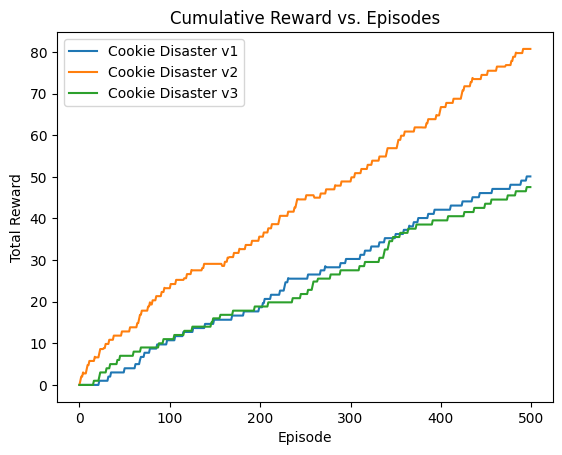

In [20]:
plt.plot(rewards[0], label='Cookie Disaster v1')
plt.plot(rewards[1], label='Cookie Disaster v2')
plt.plot(rewards[2], label='Cookie Disaster v3')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Cumulative Reward vs. Episodes')
plt.legend()
plt.show()

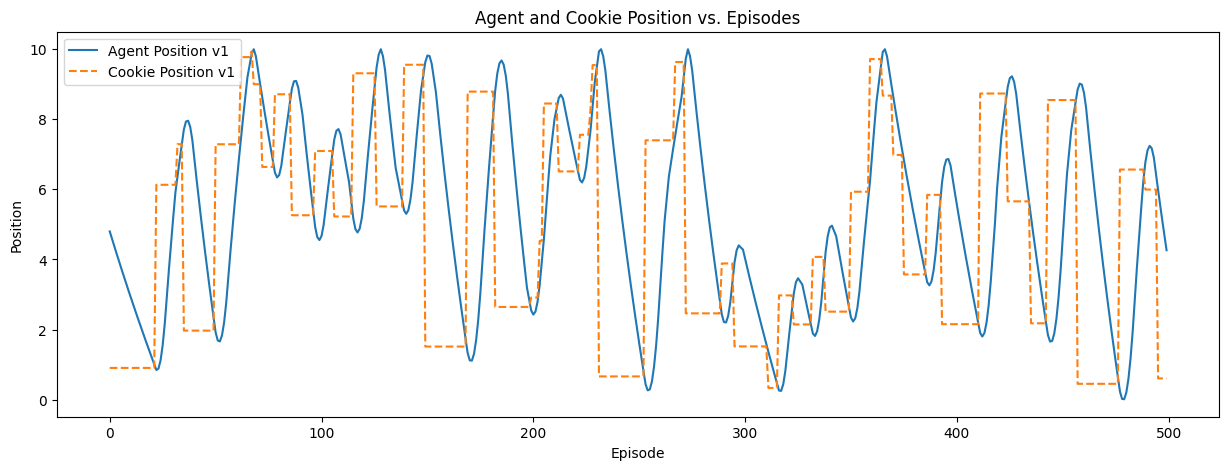

In [24]:
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(agent_poss[0], label='Agent Position v1')
ax.plot(cookie_poss[0], label='Cookie Position v1',linestyle='dashed')
ax.set_xlabel('Episode')
ax.set_ylabel('Position')
plt.title('Agent and Cookie Position vs. Episodes')
plt.legend()
plt.show()


In [11]:
env=gym.make('cookiedisaster-v1',config={"img": "cake","width" : 100, "lifetime":8, "friction": lambda vel: - abs(vel)*vel * 0.1},render_mode='human')

c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\envs\registration.py:513: DeprecationWarning: WARN: The environment cookiedisaster-v1 is out of date. You should consider upgrading to version `v3`.
  logger.deprecation(


In [12]:
properAgent = CookieAgent()
properAgent.load('cookie_patrol_agent.pth')

In [13]:
test_agent(properAgent,env)

c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\utils\passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'dict'>
  logger.warn(
c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\spaces\box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


First observation: {'agent': {'pos': 50.0, 'vel': 0.0}, 'cookie': {'pos': 8.579460051983512, 'time': 8}}


c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\utils\passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'dict'>
  logger.warn(
c:\Users\saraa\anaconda3\envs\inf368\Lib\site-packages\gymnasium\utils\passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.0,
  0.0],
 [49.8,
  49.604,
  49.4118416,
  49.22337568506906,
  49.03846171024719,
  48.85696705323377,
  48.47876642727278,
  48.11486937265953,
  47.76421442468189,
  47.42585536595837,
  47.09894499249688,
  46.782721658263064,
  46.47649804374064,
  46.17965171942734,
  45.89161716913987,
  45.61187900906833,
  45.33996619281681,
  45.075447034529475,
  44.8179249

In [12]:
env.render()

In [26]:
env.close()

In [14]:
env.step(0)

({'agent': {'pos': 5.657799601146133, 'vel': -3.235379636379872},
  'cookie': {'pos': 4.908153825604156, 'time': 3.599999999999996}},
 0,
 False,
 False,
 {'distance': 0.7496457755419765, 'steps': 101})

In [15]:
normalize(0,0,10)

NameError: name 'normalize' is not defined

In [ ]:
normalize(5,-4,4)

1.25